In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy import constants
from uncertainties import unumpy
from uncertainties import ufloat
from uncertainties.umath import *

In [2]:
df = pd.read_csv("dados.csv")

In [3]:
df.head()

,I(A),dI(A),angulo(graus),dtheta
0,2.94,0.05,134.0,0.05
1,2.60,0.05,137.5,0.05
2,2.30,0.04,141.0,0.05
3,1.99,0.04,146.0,0.05
4,1.70,0.03,151.0,0.05


In [41]:
df['tan(theta)'] = np.round(np.tan(np.radians(df['angulo(graus)'])),4)


In [42]:
df['dtan(theta)'] = (np.tan(np.radians(df['angulo(graus)'] + 0.5)) *0.5)- (np.tan(np.radians(df['angulo(graus)'] - 0.5)) * 0.5)
df['dtan(theta)'] = np.round(df['dtan(theta)'],4)

In [43]:
df.head(10)

,I(A),dI(A),angulo(graus),dtheta,tan(theta),dtan(theta),B_fio,B_terra,incerteza,dB_terra
0,2.94,0.05,134.0,0.05,-1.0355,0.0181,0.000073,-0.000070,6.163695e-06,0.004929
1,2.60,0.05,137.5,0.05,-0.9163,0.0161,0.000064,-0.000070,5.593660e-06,0.004359
2,2.30,0.04,141.0,0.05,-0.8098,0.0145,0.000057,-0.000070,4.843774e-06,0.003856
3,1.99,0.04,146.0,0.05,-0.6745,0.0127,0.000049,-0.000073,4.324036e-06,0.003336
4,1.70,0.03,151.0,0.05,-0.5543,0.0114,0.000042,-0.000076,3.590916e-06,0.002850
5,1.40,0.03,156.5,0.05,-0.4348,0.0104,0.000035,-0.000079,3.087944e-06,0.002347
6,1.10,0.03,158.5,0.05,-0.3939,0.0101,0.000027,-0.000069,2.584972e-06,0.001844
7,0.80,0.02,161.5,0.05,-0.3346,0.0097,0.000020,-0.000059,1.835086e-06,0.001341
8,0.51,0.02,166.5,0.05,-0.2401,0.0092,0.000013,-0.000052,1.348880e-06,0.000855
9,0.30,0.01,169.5,0.05,-0.1853,0.0090,0.000007,-0.000040,7.498857e-07,0.000503


In [11]:
def reta(x,m,b): 
    return m*x + b

In [12]:
slope, intercept, r, p, se = linregress(df['tan(theta)'], df['I(A)'])

In [49]:
print("Coeficiente angular = ", slope)

Coeficiente angular =  -3.0510247250164513


In [13]:
fit_reta = reta(df['tan(theta)'], slope, intercept)

/home/filipe/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


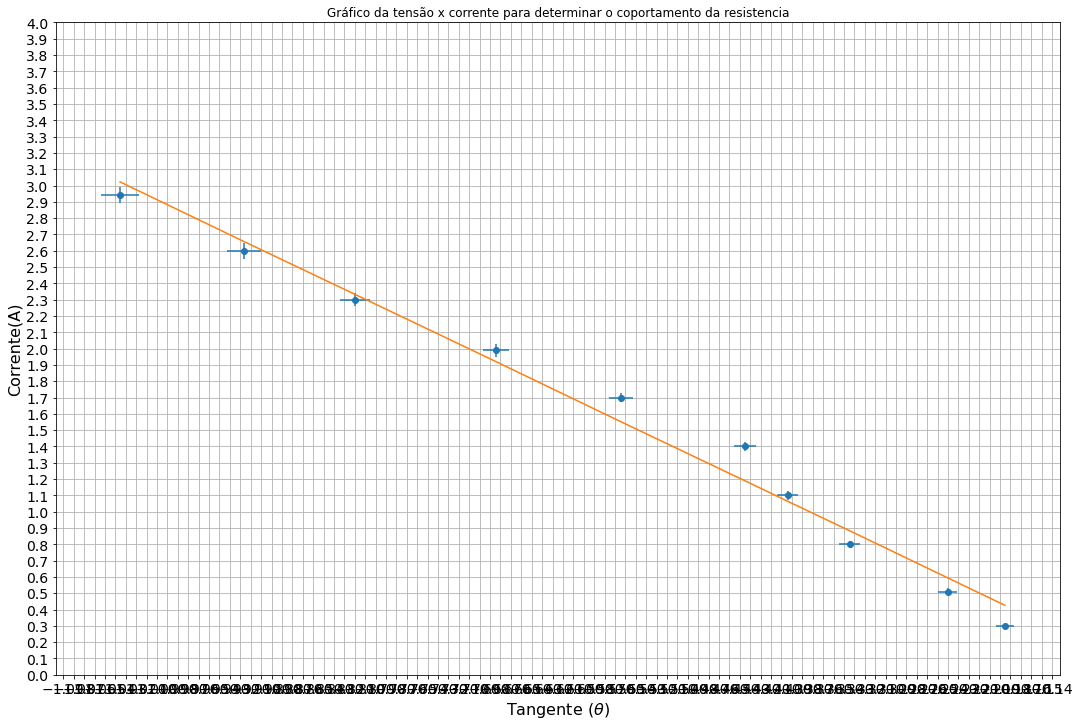

In [92]:
plt.figure(figsize=(18,12))
plt.errorbar(df['tan(theta)'], df['I(A)'], xerr=df['dtan(theta)'], yerr=df['dI(A)'], fmt='o')
plt.plot(df['tan(theta)'], fit_reta)

plt.xlabel(r'Tangente ($\theta$)',fontsize=16)
plt.ylabel('Corrente(A)', fontsize=16)

#Título:
plt.title('Gráfico da tensão x corrente para determinar o coportamento da resistencia')
# Escala
ax=plt.axes()


# Eixo Y 
plt.yticks(fontsize=14)
plt.ylim(0,4)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
#plt.tick_params(axis='y', which='minor', length=3,width='1')
#plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=14)
#plt.xlim([-10,10])
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.01))
#plt.tick_params(axis='x', which='minor', length=2,width='1')
#plt.tick_params(axis='x', which='major', length=4,width='2')
# plt.savefig('VxI', dpi='figure')
#plt.savefig('VxI')

plt.grid()
plt.show()

# O que falta

1) Cacular a distancia do fio a bussola

2) Calcular a componente horizontal do campo magnetico da terra

# Campo magnetico
* $B_{fio}$ pode ser calculado pela lei de Biot-Savart

$B_{fio} = \frac{\mu_0 i}{2 \pi R}$


In [44]:
print(mu_0)

1.25663706212e-06


In [65]:
mu_0 = constants.mu_0 
distancia = 16.2 * 10**(-3)
incerteza = 1.1 * 10**(-3)
df['B_fio'] = (mu_0 * df['I(A)'])/(2 *np.pi * distancia)
df['incerteza'] = df['B_fio'] * (df['dI(A)']/df['I(A)'] + (incerteza/distancia))
arr_corr = unumpy.uarray(df['I(A)'],df['dI(A)'])
distancia_inc = ufloat(distancia,1.1)
B_horizontal = (mu_0 * arr_corr)/(np.pi * distancia_inc)
df.head(10)

,I(A),dI(A),angulo(graus),dtheta,tan(theta),dtan(theta),B_fio,B_terra,incerteza,dB_terra
0,2.94,0.05,134.0,0.05,-1.0355,0.0181,0.000036,-0.000070,3.081847e-06,0.004929
1,2.60,0.05,137.5,0.05,-0.9163,0.0161,0.000032,-0.000070,2.796830e-06,0.004359
2,2.30,0.04,141.0,0.05,-0.8098,0.0145,0.000028,-0.000070,2.421887e-06,0.003856
3,1.99,0.04,146.0,0.05,-0.6745,0.0127,0.000025,-0.000073,2.162018e-06,0.003336
4,1.70,0.03,151.0,0.05,-0.5543,0.0114,0.000021,-0.000076,1.795458e-06,0.002850
5,1.40,0.03,156.5,0.05,-0.4348,0.0104,0.000017,-0.000079,1.543972e-06,0.002347
6,1.10,0.03,158.5,0.05,-0.3939,0.0101,0.000014,-0.000069,1.292486e-06,0.001844
7,0.80,0.02,161.5,0.05,-0.3346,0.0097,0.000010,-0.000059,9.175431e-07,0.001341
8,0.51,0.02,166.5,0.05,-0.2401,0.0092,0.000006,-0.000052,6.744399e-07,0.000855
9,0.30,0.01,169.5,0.05,-0.1853,0.0090,0.000004,-0.000040,3.749428e-07,0.000503


In [66]:
df['B_terra'] = df['B_fio']/df['tan(theta)']

In [67]:
df['B_terra'].min()

-3.975149638153844e-05

In [68]:
df.head(20)

,I(A),dI(A),angulo(graus),dtheta,tan(theta),dtan(theta),B_fio,B_terra,incerteza,dB_terra
0,2.94,0.05,134.0,0.05,-1.0355,0.0181,0.000036,-0.000035,3.081847e-06,0.004929
1,2.60,0.05,137.5,0.05,-0.9163,0.0161,0.000032,-0.000035,2.796830e-06,0.004359
2,2.30,0.04,141.0,0.05,-0.8098,0.0145,0.000028,-0.000035,2.421887e-06,0.003856
3,1.99,0.04,146.0,0.05,-0.6745,0.0127,0.000025,-0.000036,2.162018e-06,0.003336
4,1.70,0.03,151.0,0.05,-0.5543,0.0114,0.000021,-0.000038,1.795458e-06,0.002850
5,1.40,0.03,156.5,0.05,-0.4348,0.0104,0.000017,-0.000040,1.543972e-06,0.002347
6,1.10,0.03,158.5,0.05,-0.3939,0.0101,0.000014,-0.000034,1.292486e-06,0.001844
7,0.80,0.02,161.5,0.05,-0.3346,0.0097,0.000010,-0.000030,9.175431e-07,0.001341
8,0.51,0.02,166.5,0.05,-0.2401,0.0092,0.000006,-0.000026,6.744399e-07,0.000855
9,0.30,0.01,169.5,0.05,-0.1853,0.0090,0.000004,-0.000020,3.749428e-07,0.000503


In [69]:
print(B_horizontal[0].n)
print(B_horizontal[0].s)
print(B_horizontal)

7.259259263211024e-05
0.004929126814812313
[7.259259263211024e-05+/-0.004929126814812313
 6.419753089914512e-05+/-0.0043590917790881124
 5.679012348770529e-05+/-0.0038561196225609666
 4.9135802495884147e-05+/-0.003336381797140566
 4.197530866482565e-05+/-0.002850175375967067
 3.456790125338583e-05+/-0.0023472032884093125
 2.716049384194601e-05+/-0.001844231212102338
 1.975308643050619e-05+/-0.001341259046066916
 1.2592592599447694e-05+/-0.0008550527265155989
 7.4074074114398205e-06+/-0.0005029721687902424]


In [70]:
df['dB_terra'] = 0
for i in range(len(df['I(A)'])):
   # df.iloc[['dB_terra'][i]] = B_horizontal[i].s
   df['dB_terra'].iloc[i] =  B_horizontal[i].s


/home/filipe/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [71]:
df.head(10)

,I(A),dI(A),angulo(graus),dtheta,tan(theta),dtan(theta),B_fio,B_terra,incerteza,dB_terra
0,2.94,0.05,134.0,0.05,-1.0355,0.0181,0.000036,-0.000035,3.081847e-06,0.004929
1,2.60,0.05,137.5,0.05,-0.9163,0.0161,0.000032,-0.000035,2.796830e-06,0.004359
2,2.30,0.04,141.0,0.05,-0.8098,0.0145,0.000028,-0.000035,2.421887e-06,0.003856
3,1.99,0.04,146.0,0.05,-0.6745,0.0127,0.000025,-0.000036,2.162018e-06,0.003336
4,1.70,0.03,151.0,0.05,-0.5543,0.0114,0.000021,-0.000038,1.795458e-06,0.002850
5,1.40,0.03,156.5,0.05,-0.4348,0.0104,0.000017,-0.000040,1.543972e-06,0.002347
6,1.10,0.03,158.5,0.05,-0.3939,0.0101,0.000014,-0.000034,1.292486e-06,0.001844
7,0.80,0.02,161.5,0.05,-0.3346,0.0097,0.000010,-0.000030,9.175431e-07,0.001341
8,0.51,0.02,166.5,0.05,-0.2401,0.0092,0.000006,-0.000026,6.744399e-07,0.000855
9,0.30,0.01,169.5,0.05,-0.1853,0.0090,0.000004,-0.000020,3.749428e-07,0.000503


In [125]:
df['incerteza']

0    3.081847e-06
1    2.796830e-06
2    2.421887e-06
3    2.162018e-06
4    1.795458e-06
5    1.543972e-06
6    1.292486e-06
7    9.175431e-07
8    6.744399e-07
9    3.749428e-07
Name: incerteza, dtype: float64

In [124]:
df['B_fio'].mean()

1.93086419858198e-05

In [74]:
df['incerteza'].mean()

1.7061423572769004e-06

In [75]:
df['dB_terra'].mean()

0.002622161383145343

In [76]:
7.3 * 10**(-6)

7.2999999999999996e-06

In [77]:
0.000073


7.3e-05

In [96]:
slope2, intercept2, r2, p2, se2 = linregress(df['tan(theta)'], df['B_fio'])
x = np.linspace(-1.1,-0.1,1000)
fit_reta2 = reta(x, slope2, intercept2)

/home/filipe/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


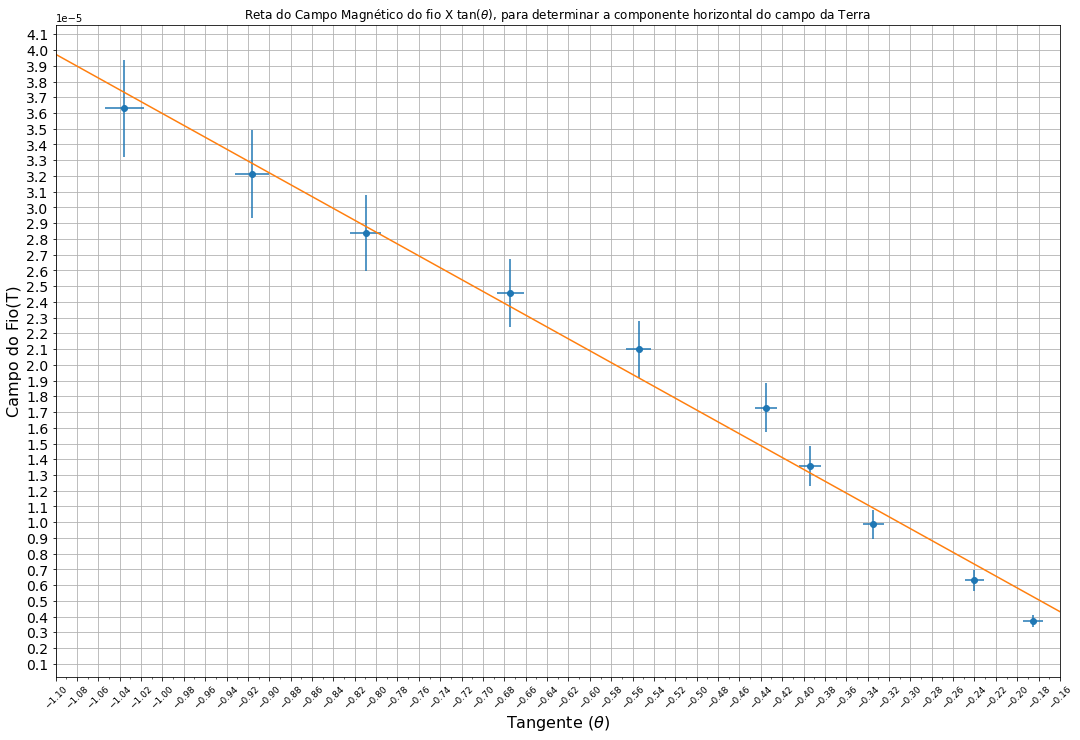

In [121]:
plt.figure(figsize=(18,12))
plt.errorbar(df['tan(theta)'], df['B_fio'], xerr=df['dtan(theta)'], yerr=df['incerteza'], fmt='o')
plt.plot(x, fit_reta2)

plt.xlabel(r'Tangente ($\theta$)',fontsize=16)
plt.ylabel('Campo do Fio(T)', fontsize=16)

#Título:
plt.title(r'Reta do Campo Magnético do fio X tan($\theta$), para determinar a componente horizontal do campo da Terra')
# Escala
ax=plt.axes()


# Eixo Y 
plt.yticks(fontsize=14)
#plt.ylim(0,4)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1 * 10**(-5)))
#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
#plt.tick_params(axis='y', which='minor', length=3,width='1')
#plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=9 , rotation=45)
plt.xlim([-1.10,-0.16])
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
#plt.tick_params(axis='x', which='minor', length=2,width='1')
#plt.tick_params(axis='x', which='major', length=4,width='2')
# plt.savefig('VxI', dpi='figure')

plt.grid()

plt.savefig('CampoMagnetico.pdf')

plt.show()


In [80]:
print(slope2)

-3.767919813423754e-05


In [86]:
x = ufloat(38,2)
seno = sin(x)
print(seno)
#B = ufloat(37,2)/seno

0.3+/-1.9


In [84]:
print(B)

(1+/-8)e+02
